### 변수선택
1. 변수확인
2. 스케일링
3. 중요도분석
4. correlation matrix

In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '../../')

from config.global_params import variable_info

In [2]:
print (variable_info.keys())
print (len(variable_info.keys()))

dict_keys(['NDNSW_surface', 'NCPCP_surface', 'SNOL_surface', 'UGRD_10m', 'VGRD_10m', 'TMP_1_5m', 'TMIN_1_5m', 'TMAX_1_5m', 'SPFH_1_5m', 'RH_1_5ma', 'VIS_1_5m', 'DPT_1_5m', 'MAXGUST_0m', 'LCDC', 'MCDC', 'HCDC', 'TCAR', 'PRMSL_meansealevel', 'TMP_surface', 'PRES_surface'])
20


1. 변수분석

In [3]:
# # savez
# np.savez( nwp_outf, value=tran_x, stn_id=stn_id, value_name=feature_name )
# np.savez( obs_outf, value=tran_y, stn_id=stn_id, value_name='TARGET_UV' )

# # savez load
# nwp = np.load( nwp_read )['value']
# obs = np.load( obs_read )['value']
# feature_name = np.load( nwp_read )['value_name']
# stn_id = np.load( obs_read )['stn_id']

(868, 49, 20)
(868, 49, 2)
(42532, 20)
(42532, 2)


array([[<Axes: title={'center': 'OBS_U'}>,
        <Axes: title={'center': 'OBS_V'}>]], dtype=object)

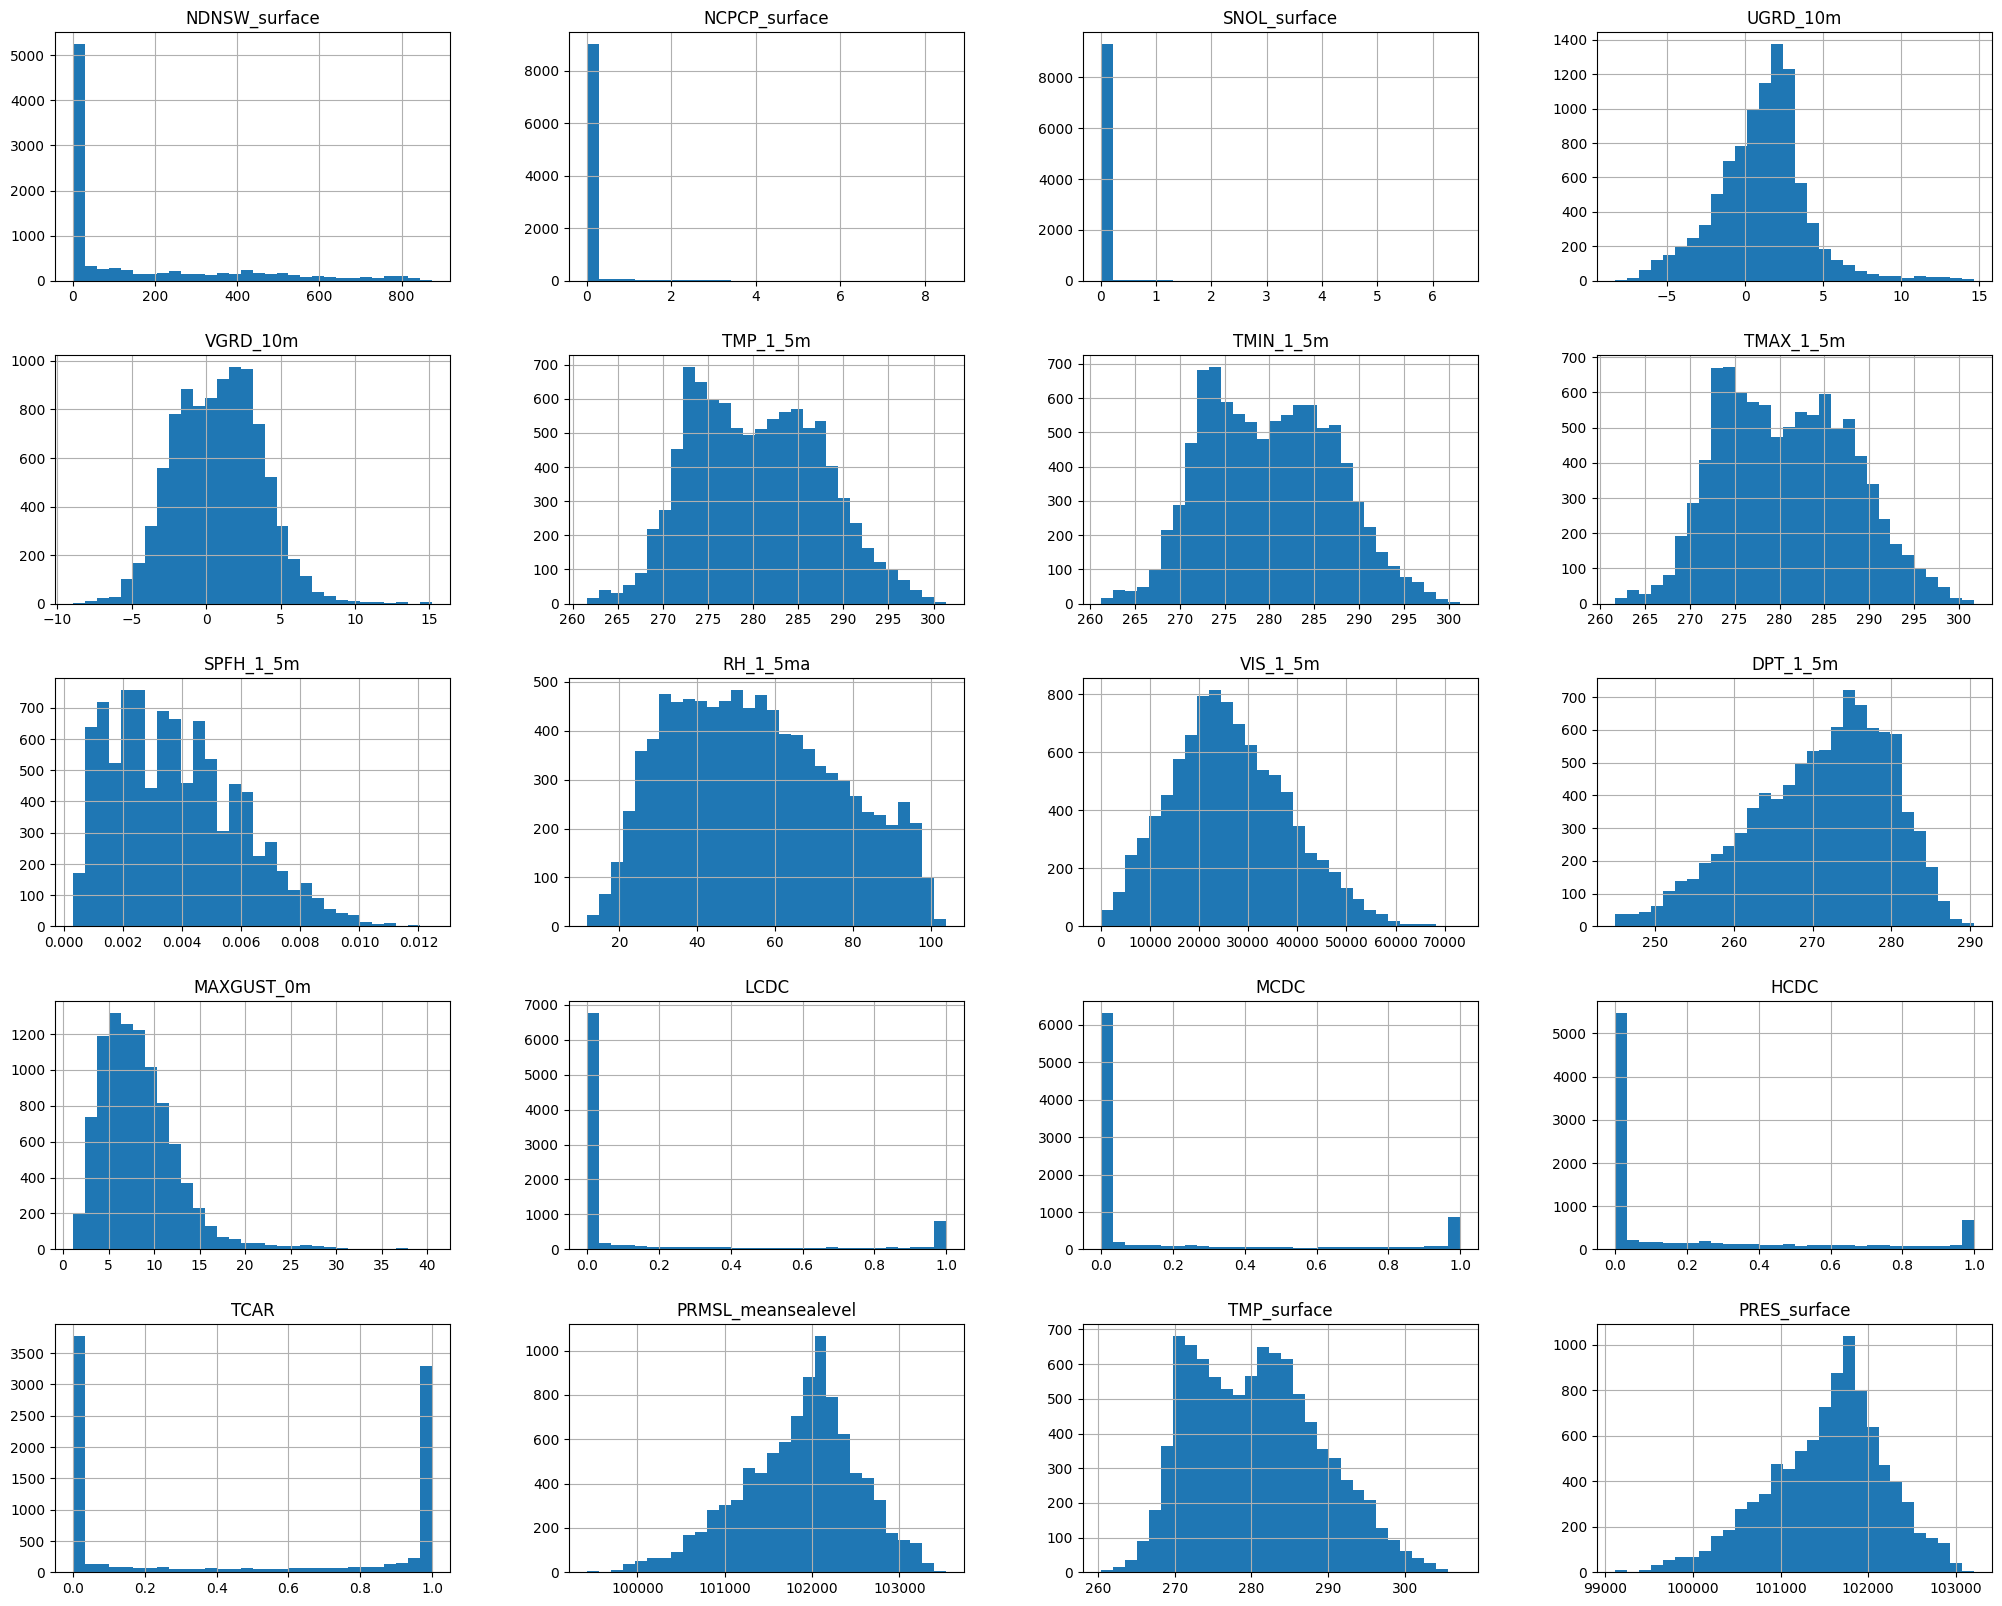

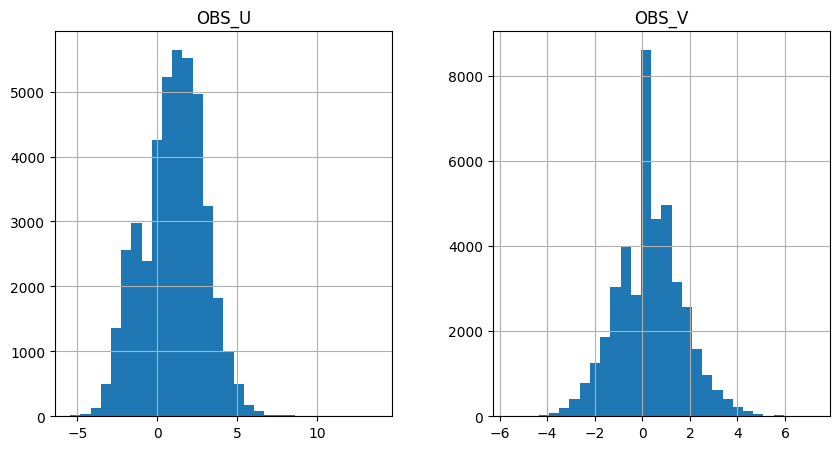

In [4]:
import matplotlib.pyplot as plt

nwp_file = "../../DAIO/nwp_data_47105"
obs_file = "../../DAIO/obs_data_47105"
nwp_data = np.load(nwp_file)
obs_data = np.load(obs_file)
print(nwp_data.shape)
print(obs_data.shape)

plot_nwp = pd.DataFrame(data=np.reshape(nwp_data, (-1,20)), columns=variable_info.keys())
plot_obs = pd.DataFrame(data=np.reshape(obs_data, (-1,2)), columns=['OBS_U', 'OBS_V'])

print(plot_nwp.shape)
print(plot_obs.shape)

#plt.figure(figsize=(20, 30))
plot_nwp.hist(bins=30, figsize=(25,20))
plot_obs.hist(bins=30, figsize=(10,5))
#plot_obs.plot(kind='hist', figsize=(20,30))
#plt.xlabel(fontsize=14)
#plt.ylabel(fontsize=14)
#plt.show()

<Axes: >

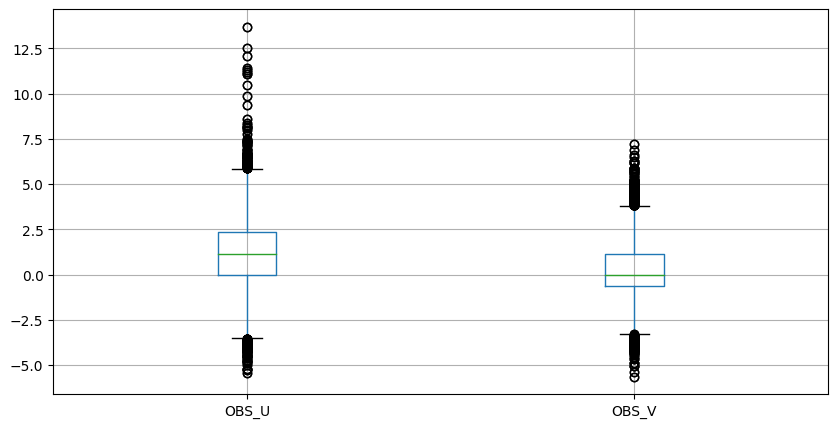

In [5]:
# box plot

plot_obs.boxplot(figsize=(10,5))

NDNSW_surface            Axes(0.125,0.11;0.032563x0.77)
NCPCP_surface         Axes(0.164076,0.11;0.032563x0.77)
SNOL_surface          Axes(0.203151,0.11;0.032563x0.77)
UGRD_10m              Axes(0.242227,0.11;0.032563x0.77)
VGRD_10m              Axes(0.281303,0.11;0.032563x0.77)
TMP_1_5m              Axes(0.320378,0.11;0.032563x0.77)
TMIN_1_5m             Axes(0.359454,0.11;0.032563x0.77)
TMAX_1_5m             Axes(0.398529,0.11;0.032563x0.77)
SPFH_1_5m             Axes(0.437605,0.11;0.032563x0.77)
RH_1_5ma              Axes(0.476681,0.11;0.032563x0.77)
VIS_1_5m              Axes(0.515756,0.11;0.032563x0.77)
DPT_1_5m              Axes(0.554832,0.11;0.032563x0.77)
MAXGUST_0m            Axes(0.593908,0.11;0.032563x0.77)
LCDC                  Axes(0.632983,0.11;0.032563x0.77)
MCDC                  Axes(0.672059,0.11;0.032563x0.77)
HCDC                  Axes(0.711134,0.11;0.032563x0.77)
TCAR                   Axes(0.75021,0.11;0.032563x0.77)
PRMSL_meansealevel    Axes(0.789286,0.11;0.03256

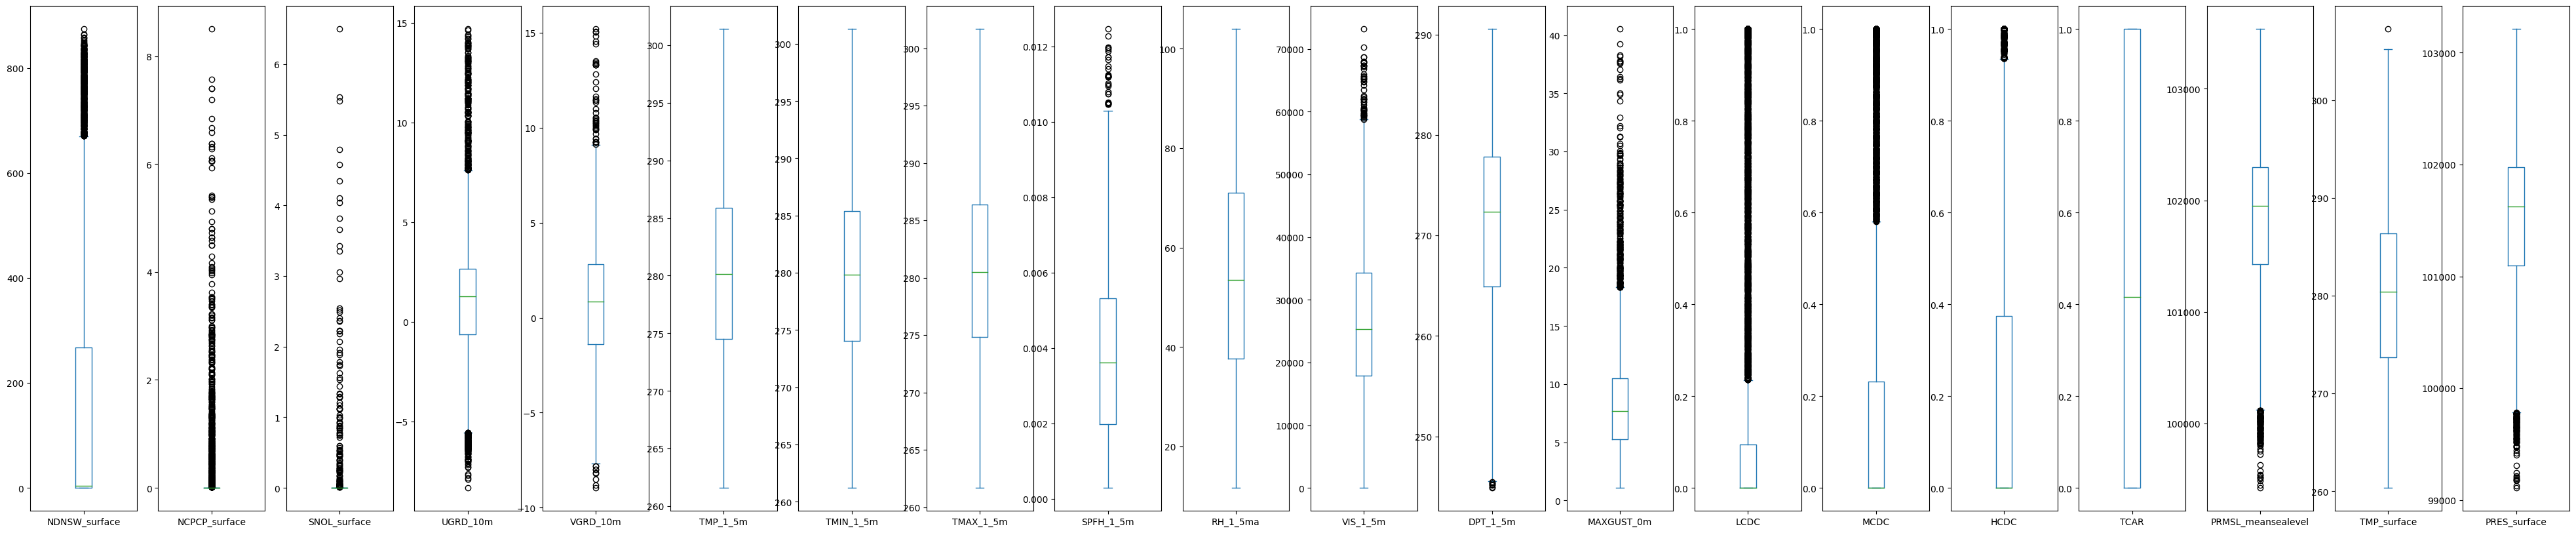

In [6]:
plot_nwp.plot(kind='box', subplots=True, figsize=(50,10))

### 결측일 통합 및 제거

In [7]:
# 결측제거
print(nwp_data.shape)
print(obs_data.shape)

missing_nwp = set(np.where(np.isnan(nwp_data))[0])
missing_obs = set(np.where(np.isnan(obs_data))[0])
print(missing_obs)
print("nwp 결측: ", len(missing_nwp))
print("obs 결측: ", len(missing_obs))

missing_all = list(missing_nwp | missing_obs)
print("결측 합계: ", len(missing_all))

rem_nwp_data = np.delete(nwp_data, missing_all, 0)
rem_obs_data = np.delete(obs_data, missing_all, 0)
print(rem_nwp_data.shape)
print(rem_obs_data.shape)


(868, 49, 20)
(868, 49, 2)
{544, 545, 427, 428, 429, 587, 588, 600, 601, 602, 284, 285}
nwp 결측:  676
obs 결측:  12
결측 합계:  676
(192, 49, 20)
(192, 49, 2)


### 변수선택

(9408, 20) (9408, 2) ['NDNSW_surface', 'NCPCP_surface', 'SNOL_surface', 'UGRD_10m', 'VGRD_10m', 'TMP_1_5m', 'TMIN_1_5m', 'TMAX_1_5m', 'SPFH_1_5m', 'RH_1_5ma', 'VIS_1_5m', 'DPT_1_5m', 'MAXGUST_0m', 'LCDC', 'MCDC', 'HCDC', 'TCAR', 'PRMSL_meansealevel', 'TMP_surface', 'PRES_surface'] <class 'list'>
RandomForest Regressor ing..
Features sorted by their score:
Feature ranking:
20. feature 2 SNOL_surface (0.001450)
19. feature 1 NCPCP_surface (0.003581)
18. feature 14 MCDC (0.019869)
17. feature 15 HCDC (0.020550)
16. feature 16 TCAR (0.023621)
15. feature 13 LCDC (0.028025)
14. feature 6 TMIN_1_5m (0.040073)
13. feature 5 TMP_1_5m (0.040084)
12. feature 7 TMAX_1_5m (0.041892)
11. feature 10 VIS_1_5m (0.042171)
10. feature 18 TMP_surface (0.048852)
9. feature 8 SPFH_1_5m (0.050075)
8. feature 11 DPT_1_5m (0.057153)
7. feature 19 PRES_surface (0.059656)
6. feature 9 RH_1_5ma (0.060131)
5. feature 17 PRMSL_meansealevel (0.061084)
4. feature 0 NDNSW_surface (0.064463)
3. feature 12 MAXGUST_0m (

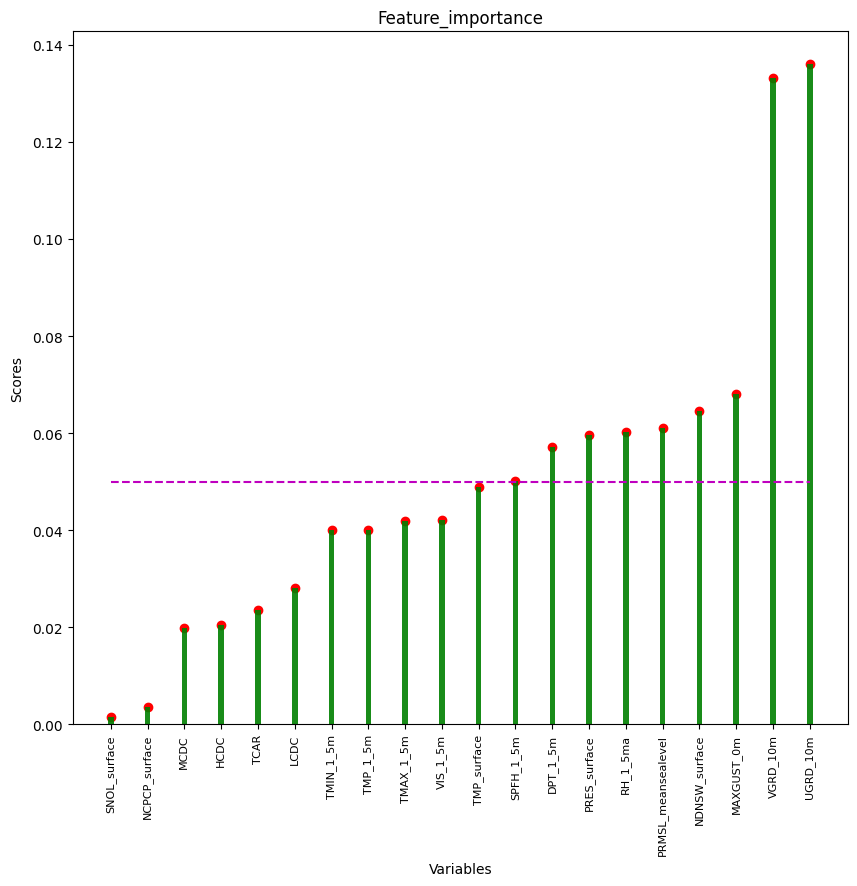

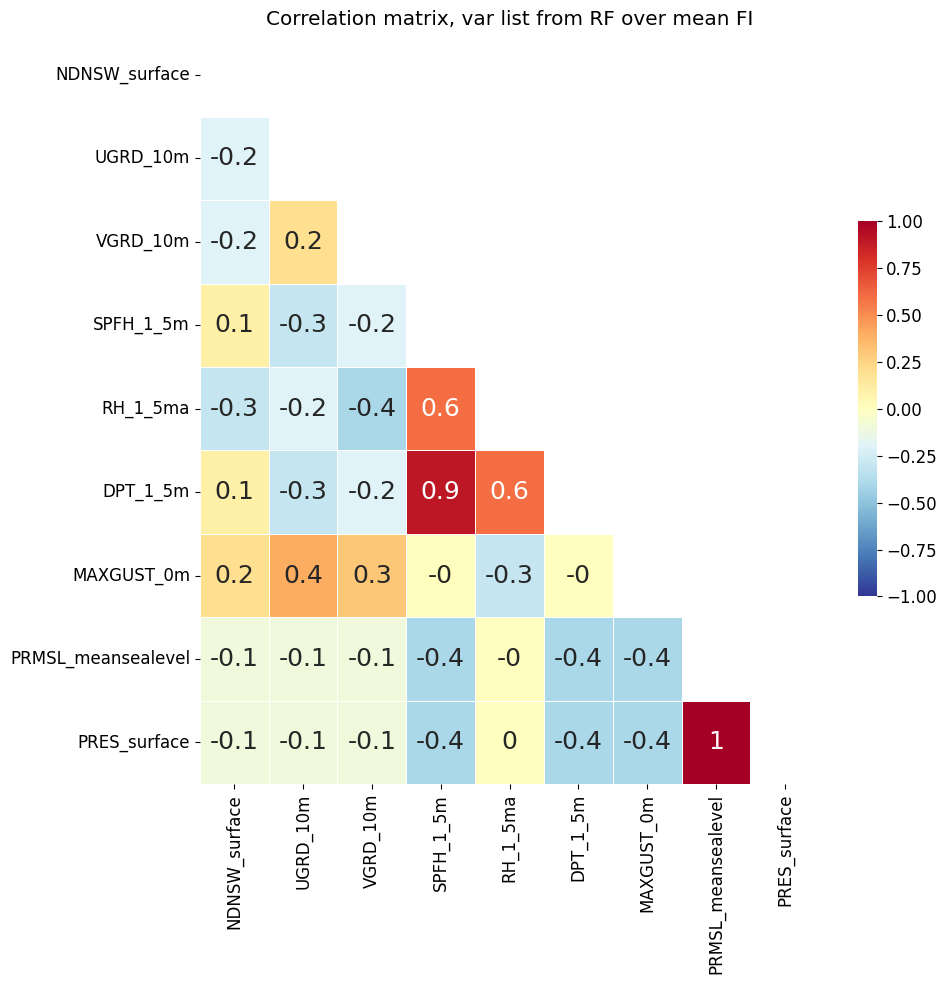

In [8]:
#----------------------------------------------------------------------------
# .. module load
import numpy as np
#from BorutaShap import BorutaShap
#from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import os
import sys
import time
import joblib

#.. local
sys.path.insert(0, '../inc')
from plot_importance import plot_importance_barh, plot_importance_hline
from cr_matrix import plot_correlation_matrix
from get_importance import get_feature_importances


#----------------------------------------------------------------------------
# .. Load data

# .. ori load code
input_dir = "../dat/"
print_dir = "../out/"
# #data_per = "2016050100-2021043000-24-1605-2104"
#data_per = "sample"
data_per = "test1stn"
# input_x = "test_nwp_" + data_per
# input_y = "test_obs_" + data_per

# nwp = np.load(input_dir + input_x + ".npz")['value']
# obs = np.load(input_dir + input_y + ".npz")['value']
# header = np.load(input_dir + input_x + ".npz")['value_name']
# header = header.tolist()

# .. load code
header = list(variable_info.keys())
X = rem_nwp_data
y = rem_obs_data
x_features = X.shape[-1]
y_features = y.shape[-1]

X = X.reshape(-1,x_features)
y = y.reshape(-1,y_features)

print (np.shape(X), np.shape(y), header, type(header)) # variable, day, forecast_time

#----------------------------------------------------------------------------
# .. model run

# .. set model & fit
print("RandomForest Regressor ing..")
forest = RandomForestRegressor(n_jobs=-1, criterion='squared_error', max_depth=30,  ## max_depth=5
                          min_samples_split=3, max_features=0.33, random_state=1)
#forest = RandomForestRegressor(n_jobs=-1, criterion='mse', random_state=0)
#forest = RandomForestRegressor(n_estimators= 2, n_jobs=-1, random_state=0)
forest.fit(X, y)


# .. get feature importance
print( "Features sorted by their score:")
importances = forest.feature_importances_

# .. sort importance
indices = np.argsort(importances)[::-1]
sorted_importances= []
sorted_feature_name= []
print("Feature ranking:")
feature_name = header
for f in range(X.shape[1]-1,-1,-1):
   #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]) )
   print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_name[indices[f]], importances[indices[f]]) )
   sorted_importances.append(importances[indices[f]])
   sorted_feature_name.append(feature_name[indices[f]])
   
# .. save RF result
save_name = print_dir + "rf_hline_" + data_per
print(save_name)

plot_importance_hline(sorted_feature_name, sorted_importances, save_name, font_size=12)
joblib.dump(forest, "../daba/" + "rf_regressor_" + data_per)


#----------------------------------------------------------------------------
# .. feature select over mean

# .. select variable
sfm = SelectFromModel(estimator=forest, prefit=True, threshold='mean', max_features=None)
sel_idx=sfm.get_support()
print("sel idx: ", sel_idx)
filter_X = X[:,sel_idx]
filter_H = list(np.array(header)[sel_idx])
print("after select variable: ", filter_X.shape)

save_name = print_dir + "cr_matrix_" + data_per
plot_correlation_matrix(filter_X, filter_H, save_name)